In [1]:
import numpy
import pandas
import math

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD

Using TensorFlow backend.


In [4]:
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [6]:
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [8]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#print(len(train), len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=8):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

sgd = SGD(lr=0.1)
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=sgd)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/100
 - 1s - loss: 0.0277
Epoch 2/100
 - 0s - loss: 0.0260
Epoch 3/100
 - 0s - loss: 0.0252
Epoch 4/100
 - 0s - loss: 0.0240
Epoch 5/100
 - 0s - loss: 0.0236
Epoch 6/100
 - 0s - loss: 0.0236
Epoch 7/100
 - 0s - loss: 0.0225
Epoch 8/100
 - 0s - loss: 0.0215
Epoch 9/100
 - 0s - loss: 0.0196
Epoch 10/100
 - 0s - loss: 0.0207
Epoch 11/100
 - 0s - loss: 0.0211
Epoch 12/100
 - 0s - loss: 0.0204
Epoch 13/100
 - 0s - loss: 0.0198
Epoch 14/100
 - 0s - loss: 0.0182
Epoch 15/100
 - 0s - loss: 0.0193
Epoch 16/100
 - 0s - loss: 0.0201
Epoch 17/100
 - 0s - loss: 0.0190
Epoch 18/100
 - 0s - loss: 0.0181
Epoch 19/100
 - 0s - loss: 0.0196
Epoch 20/100
 - 0s - loss: 0.0193
Epoch 21/100
 - 0s - loss: 0.0181
Epoch 22/100
 - 0s - loss: 0.0177
Epoch 23/100
 - 0s - loss: 0.0184
Epoch 24/100
 - 0s - loss: 0.0181
Epoch 25/100
 - 0s - loss: 0.0168
Epoch 26/100
 - 0s - loss: 0.0169
Epoch 27/100
 - 0s - loss: 0.0169
Epoch 28/100
 - 0s - loss: 0.0147
Epoch 29/100
 - 0s - loss: 0.0158
Epoch 30/100
 - 0s - lo

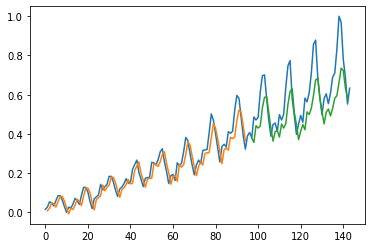

In [10]:
import matplotlib
from matplotlib import pyplot as plt

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()